In [ ]:
!pip install biopython dendropy ete3 numpy seaborn matplotlib scikit-learn


In [ ]:
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import _Matrix
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import ParsimonyScorer
from Bio.Phylo.TreeConstruction import ParsimonyTreeConstructor
import matplotlib.pyplot as plt


In [ ]:
def rename_sequences(sequences, ids):
    for seq, seq_id in zip(sequences, ids):
        seq.id = seq_id

# Import sequences
t1 = SeqIO.read("albanian.fasta", "fasta")
t2 = SeqIO.read("easterngf.fasta", "fasta")
t3 = SeqIO.read("marshfrog.fasta", "fasta")
t4 = SeqIO.read("poolfrog.fasta", "fasta")
t5 = SeqIO.read("saharafrog.fasta", "fasta")

# Rename sequences
sequences = [t1, t2, t3, t4, t5]
sequence_ids = ['Albanian', 'Eastern', 'Marsh', 'Pool', 'Sahara']
rename_sequences(sequences, sequence_ids)

# Combine sequences into a new file
waterfrog = SeqIO.write(sequences, "waterfrogs.fasta", "fasta")

In [ ]:
# Load the water frog sequences into MUSCLE
# ... (as in your original code)

# Open the alignment file as a MultipleSeqAlignment object
with open("waterfrog.aln", "r") as aln:
    alignment = AlignIO.read(aln, "clustal")

# Calculate Distance Matrix
calculator = DistanceCalculator("identity")
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

# ML Tree Construction using Bio.Phylo
nj_constructor = DistanceTreeConstructor(calculator, 'nj')
nj_tree = nj_constructor.build_tree(alignment)
nj_tree.rooted = True
print(nj_tree)

# Save ML tree to a new file
Phylo.write(nj_tree, "nj_waterfrog_tree.xml", "phyloxml")

Eastern 0.000000
Sahara  0.598580    0.000000
Marsh   0.600946    0.153785    0.000000
Albanian    0.580442    0.167192    0.121451    0.000000
Pool    0.585962    0.164038    0.119874    0.071767    0.000000
    Eastern Sahara  Marsh   Albanian    Pool
Tree(rooted=True)
    Clade(branch_length=0, name='Inner3')
        Clade(branch_length=0.016265772870662443, name='Inner2')
            Clade(branch_length=0.5154771293375394, name='Eastern')
            Clade(branch_length=0.08310331230283918, name='Sahara')
        Clade(branch_length=0.06180993690851738, name='Marsh')
        Clade(branch_length=0.022969242902208198, name='Inner1')
            Clade(branch_length=0.03601472134595163, name='Pool')
            Clade(branch_length=0.035751840168243953, name='Albanian')


1

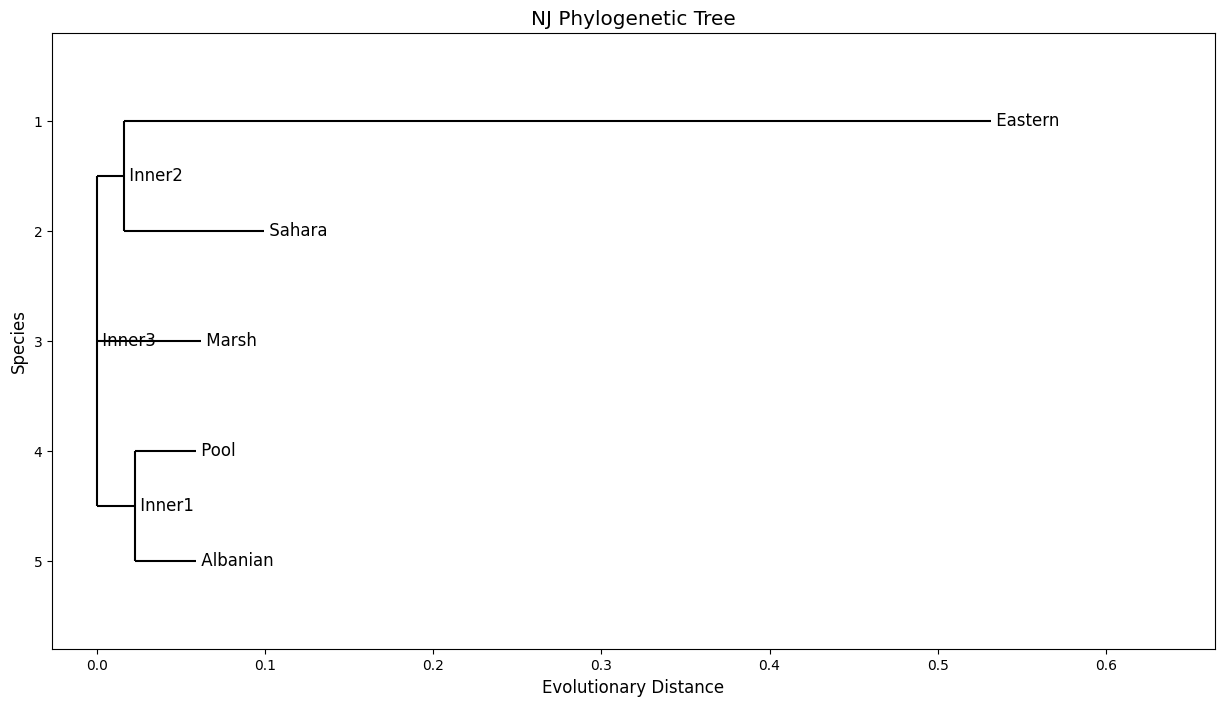

In [ ]:
# Visualize ML tree
fig, ax = plt.subplots(figsize=(15, 8), dpi=100)
Phylo.draw(nj_tree, axes=ax, do_show=False)

# Add labels and customize layout
ax.set_title("NJ Phylogenetic Tree")
ax.set_xlabel("Evolutionary Distance")
ax.set_ylabel("Species")

# Save the figure
fig.savefig("nj_waterfrog_phylogenetic_tree.png")
plt.show()

In [ ]:
import time
import tracemalloc

tracemalloc.start()

start_time = time.time()
nj_constructor.build_tree(alignment)
end_time = time.time()

print(f"Time taken for Original NJ tree construction: {end_time - start_time} seconds")
print("Byte and peak: ",tracemalloc.get_traced_memory())

tracemalloc.stop()

Time taken for Original NJ tree construction: 0.007398843765258789 seconds
Byte and peak:  (2109, 12565)


In [ ]:
# from scipy.stats import kendalltau

# # RF Distance Calculation
# def robinson_foulds_distance(tree1, tree2):
#     return kendalltau(tree1, tree2)[0]

# # Reference tree
# reference_tree = Phylo.read("upgma_waterfrog_tree.xml", "phyloxml")
# OR
# reference_tree = Phylo.read("upgma_waterfrog_tree.newick", "newick")

# # Calculate RF distance
# rf_distance = robinson_foulds_distance(reference_tree, ml_tree)
# print(f"Robinson-Foulds Distance: {rf_distance}")


In [ ]:
# Convert the tree to a different format (optional)
Phylo.convert("nj_waterfrog_tree.xml", "phyloxml", "nj-waterfrog_tree.nex", "nexus")

1

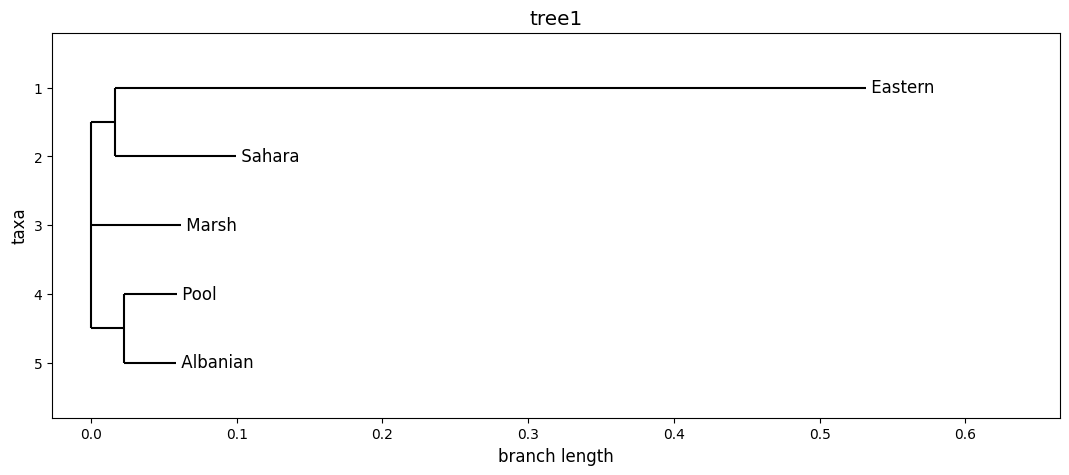

In [ ]:
import matplotlib
frog_nex = Phylo.read("nj-waterfrog_edited.nex", "nexus")

fig = plt.figure(figsize=(13, 5), dpi=100) # create figure & set the size
matplotlib.rc('font', size=12)              # fontsize of the leaf and node labels
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(frog_nex, axes=axes)
fig.savefig("waterfrog2_cladogram")